In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

Set Spatial Size of Image

In [2]:
U = 50
m = np.linspace(-1, 1, U)    
delta = m[1] - m[0]             
(x, y) = np.meshgrid(m, m)

Create Spatial Basis Functions

In [3]:
def Spatial_Basis(sigma,numgauss,points):
    basisset = []
    ker = 0
    for j in range(points):
        for i in range(numgauss):
            k = np.random.uniform(-1,1,1)
            j = np.random.uniform(-1,1,1)
            norm_constant = 1 / (2 * np.pi * sigma**2)
            rhs = np.exp(-.5 * ((x + j)**2 + (y + k)**2) / sigma**2)
            kers = norm_constant * rhs
        ker = (kers - np.min(kers))/(np.max(kers) - np.min(kers))
        basisset.append(ker)
        
    return basisset

Create Basis Time Series

In [4]:
def Basis_Series(points,t):
    seriesset = []
    for i in range(points):
        k = np.random.uniform(0,10,1)
        j = np.random.uniform(0,10,1)
        series = np.sin(t + i*k)
        seriesset.append(series)
        
    return seriesset

In [5]:
t = np.arange(0,100,1)
points = 2
numgauss = 1
sigma = .5

SB = Spatial_Basis(sigma,numgauss,points)
TS = Basis_Series(points,t)

Create Synthetic Video

In [6]:
Flat_Basis = []

for i in SB:
    imiss = i
    imiss[20:30,20:30] = 0
    Flat_Basis.append(i.flatten())

Flat_Basis  = np.vstack(Flat_Basis)

TS = np.vstack(TS)

In [7]:
print(np.shape(Flat_Basis))
print(np.shape(TS))

(2, 2500)
(2, 100)


In [8]:
video = Flat_Basis.T@TS

Perform KL Decomposition

In [9]:
U,S,V = np.linalg.svd(video@video.T)

In [10]:
np.shape(V)

(2500, 2500)

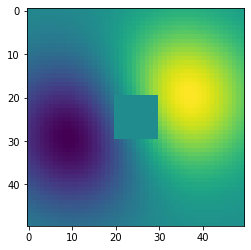

In [11]:
plt.imshow(V[0,:].reshape(50,50))

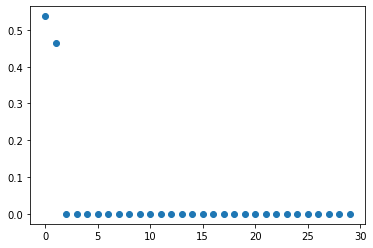

In [12]:
plt.plot(S[0:30]/(np.sum(S[0:30])),'o')

In [13]:
ProjTS = video.T@V

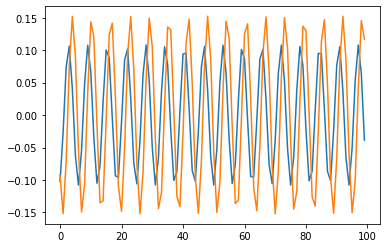

In [14]:
plt.plot(ProjTS[:,1])
plt.plot(ProjTS[:,2])


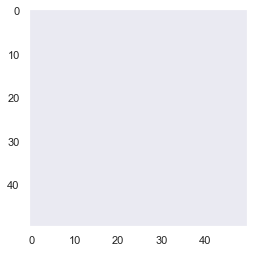

In [15]:
import matplotlib 
import matplotlib.animation as animation 
sns.set(style = "dark")
fig = plt.figure()
ims = []
for i in range(len(ProjTS)):
    img = video[:,i]
#     img = V[:,:].T@ProjTS[i,:]
    ims.append([plt.imshow(img.reshape(50,50))])
#     ims.append([plt.imshow(img)])
    
im_ani = animation.ArtistAnimation(fig, ims)
Writer = animation.writers['ffmpeg']
writer = Writer(fps=5, metadata=dict(artist='Me'), bitrate=1800)
im_ani.save('pure_sim_missing.mp4', writer=writer)
plt.show()